## 1. Load Dataset

In [ ]:
import pandas as pd

file_path = '/Users/abdullah/Desktop/ElevvoPathways/ElevvoPathways Level2 Task3/covertype/covtype.data'
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area_{i}' for i in range(4)] \
  + [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Step 2: Data Cleaning & Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (464809, 54), Test shape: (116203, 54)


## Step 3: Train Random Forest Model

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.78      0.86      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



## Step 4: Confusion Matrix (Random Forest)

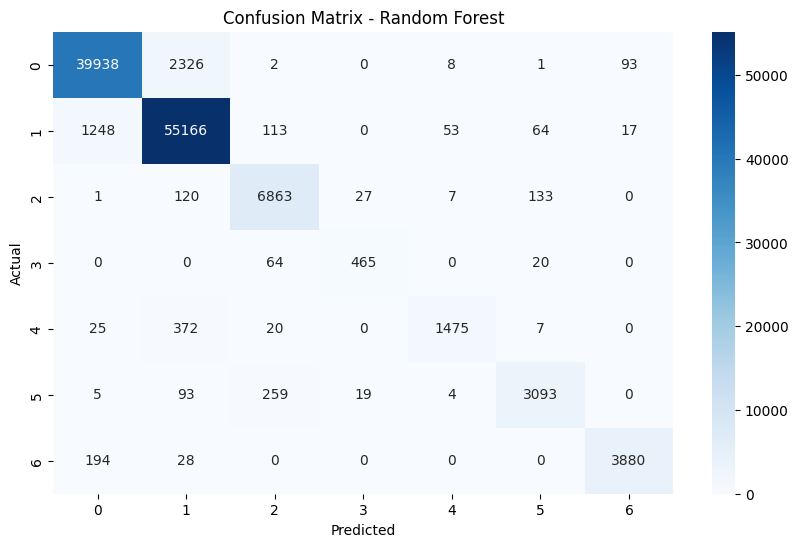

In [4]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 5: Feature Importance (Random Forest)

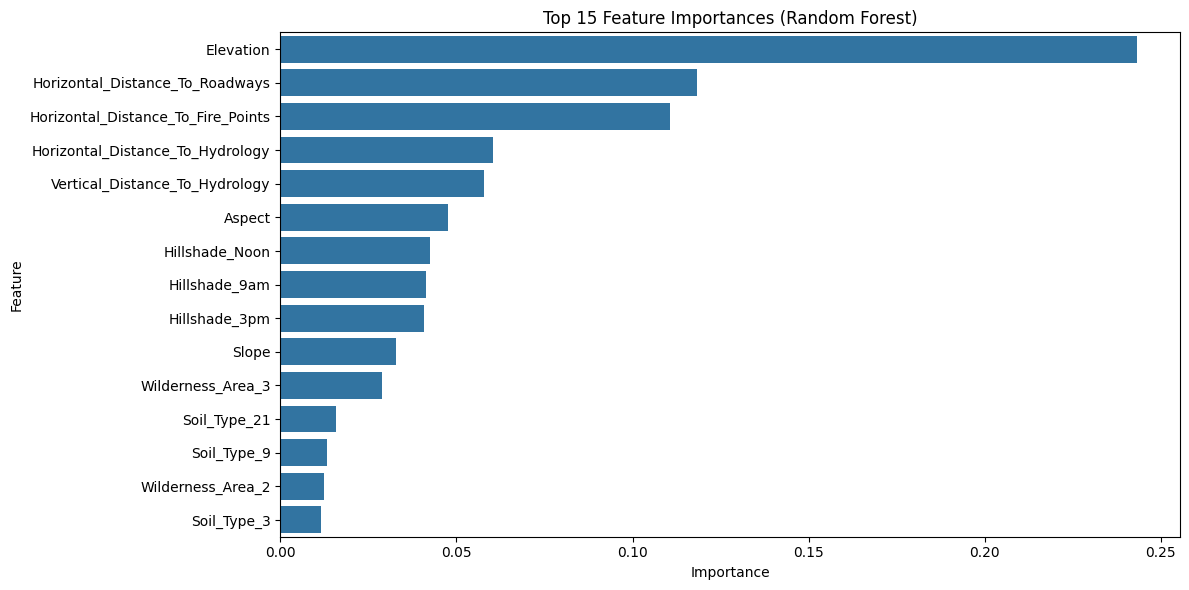

In [5]:
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

## Bonus 1: XGBoost Model

In [6]:
!pip install xgboost --quiet

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'multi:softmax',
    'num_class': 8,
    'eval_metric': 'mlogloss',
    'seed': 42
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = xgb_model.predict(dtest)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
XGBoost Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.87      0.86      0.86       549
           5       0.89      0.60      0.72      1899
           6       0.85      0.81      0.83      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



## Bonus 1: Model Comparison

In [7]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"XGBoost Accuracy:      {acc_xgb:.4f}")

Random Forest Accuracy: 0.9542
XGBoost Accuracy:      0.8685


## Bonus 2: Hyperparameter Tuning (Random Forest)

Used to quickly tune model hyperparameters efficiently.
the original one was taking more then an hour to run.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)
print("Best parameters:", grid_rf.best_params_)
print("Best accuracy:  ", grid_rf.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:   0.9368966603852193
